In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Bell's rocket ship paradox

Let's recall Bell's rocket ship paradox, originally designed by E. Dewan and M. Beran in 1959 but widely known as Bell's because he included it in an article "How to teach special relativity".

Three spaceships 0, 1 and 2 are initially at rest in a common inertial reference frame with 1 and 2 being equidistant to 0.  For example 0 could be at $(-1,0,0)$ with 1 and 2 at $(0,0,\pm 1)$.  A signal is sent from 0 to reach 1 and 2 simultaneously, causing 1 and 2 to start to accelerate in the vertical ($z$) direction, with identical accelerations (0 stays at rest in its original reference frame). If a fragile, taut string initially connects 1 and 2 does the string break as the rockets accelerate?

We've done the world line of an accelerated observer in class, so we can set up the world lines of these rockets in the initial reference frame.  For definiteness let me set the rest-frame acceleration, $g=1$, which we can take to be a definition of our time units.  In this case we have hyperbolae with $z(\tau)=z_0+\cosh(\tau)$ and $t(\tau)=\sinh(\tau)$.

In [2]:
# Set up a set of proper time points to index the world lines.
tau = np.linspace(0.0,1.4,100)
# Now make space for the (t,z) coordinates of each rocket.
r1 = np.zeros( (2,tau.size) )
r2 = np.zeros( (2,tau.size) )
# and fill them in with the known solution.  At this point we can
# choose any "initial offset" betweeen the two rockets, I'll start
# them at z=-1 and z=+1 as in the problem statement.
r1[0,:] = np.sinh(tau)
r1[1,:] = np.cosh(tau) - 2.0
r2[0,:] = np.sinh(tau)
r2[1,:] = np.cosh(tau) - 0.0

Text(0, 0.5, '$t$')

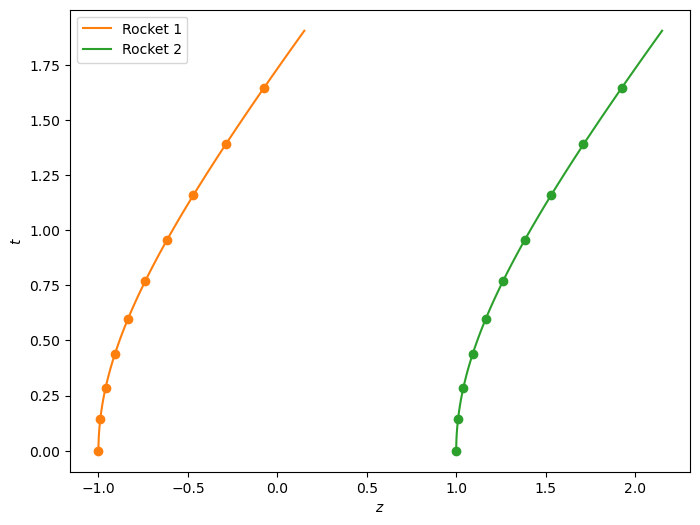

In [3]:
# Just make a space-time plot.
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(r1[1,:],r1[0,:],'-',color='C1',label='Rocket 1')
ax.plot(r2[1,:],r2[0,:],'-',color='C2',label='Rocket 2')
# We can put some markers on the world line just to help orientation later.
ax.plot(r1[1,::10],r1[0,::10],'o',color='C1')
ax.plot(r2[1,::10],r2[0,::10],'o',color='C2')
#
ax.legend()
ax.set_xlabel('$z$')
ax.set_ylabel('$t$')

Pretty obviously, and as realized by the creators of this problem, the velocity of the two rockets in this intertial frame is always the same and the length (and constant time) between them does not change.  Both of these facts are "clear" from the above figure.  Since the string will length contract (due to electromagnetic forces) it should break.

Now let's pick a fiducial (proper) time, $\tau_0$, and transform to the rest frame of the first rocket at that time using a Lorentz transformation:
$$
\left( \begin{array}{c} t' \\ z' \end{array} \right) =
\left(
\begin{array}{cc}
\gamma_0 & -\gamma_0 v_0 \\
-\gamma_0 v_0 & \gamma_0
\end{array} \right) =
\left( \begin{array}{c} t \\ z \end{array} \right)
$$

In [4]:
tau0 = 0.5
vel0 = np.tanh(tau0)
gam0 = 1/np.sqrt(1-vel0**2)
#
print("Fiducial tau0=",tau0," with vel0=",vel0," and gam0=",gam0)

Fiducial tau0= 0.5  with vel0= 0.46211715726000974  and gam0= 1.1276259652063807


In [5]:
# Make the Lorentz transformation matrix, Lambda:
lamb = np.array( [ [gam0,-gam0*vel0], [-gam0*vel0,gam0] ])
print(lamb)
# and generate world-line coordinates in the new frame.
r1p = np.dot(lamb,r1)
r2p = np.dot(lamb,r2)

[[ 1.12762597 -0.52109531]
 [-0.52109531  1.12762597]]


Text(0, 0.5, '$t^\\prime$')

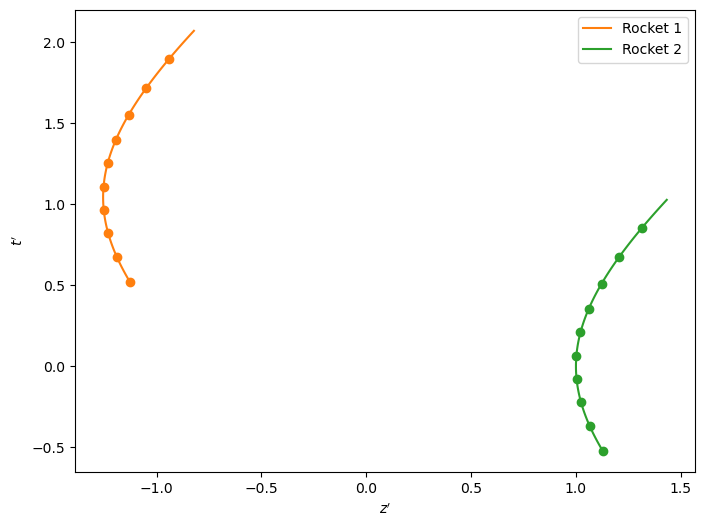

In [6]:
# Make a space-time plot in the primed coordinates
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(r1p[1,:],r1p[0,:],'-',color='C1',label='Rocket 1')
ax.plot(r2p[1,:],r2p[0,:],'-',color='C2',label='Rocket 2')
# We can put some markers on the world line just to help orientation later.
ax.plot(r1p[1,::10],r1p[0,::10],'o',color='C1')
ax.plot(r2p[1,::10],r2p[0,::10],'o',color='C2')
#
ax.legend()
ax.set_xlabel(r'$z^\prime$')
ax.set_ylabel(r'$t^\prime$')

Note how in the "rest frame" the time when the first rocket is at rest and the time when the second rocket is at rest (the points of vertical slope on each world line) are different and the "constant time" surface of this frame connects different proper time points on the two world lines!  In fact if we work in the instantaneous rest-frame of the first rocket then the second rocket is seen to be accelerating, or if we instead take the "lead" rocket's point of view we see the "trailing" rocket fall further behind.  The string should therefore be subject to stresses and break.

### Modified problem

We can make our lives slightly easier by imaginging that the rockets accelerate for a little while and then stop accelerating.  This way we don't have to deal with accelerating frames before and after some time, and can resort to our undergraduate intuition.  What this means is that we can simply extend our world lines to high $\tau$ in the original frame as lines of constant slope.

After they stop accelerating the world line is $t=t_{\star} + \gamma(\tau-\tau_{\star})$ and $z=z_{\star}+\gamma v (\tau-\tau_{\star})$.

In [7]:
# It is helpful to extend the world lines to earlier (negative) proper time,
# with the rockets at rest in the frame of rocket 0 before tau=0.
# Set up a set of proper time points to index the world lines.
tau = np.linspace(-1.0,1.4,200)
# Now make space for the (t,z) coordinates of each rocket.
r1 = np.zeros( (2,tau.size) )
r2 = np.zeros( (2,tau.size) )
# and fill them in with the known solution.  At this point we can
# choose any "initial offset" betweeen the two rockets, I'll start
# them at z=-1 and z=+1 as in the problem statement.
r1[0,:] = np.sinh(tau)
r1[1,:] = np.cosh(tau) - 2.0
r2[0,:] = np.sinh(tau)
r2[1,:] = np.cosh(tau) - 0.0
#
r1[0,tau<0] = tau[tau<0]
r1[1,tau<0] = -1.0
r2[0,tau<0] = tau[tau<0]
r2[1,tau<0] =  1.0

In [8]:
ii    = 150      # The index where we stop accelerating.
tau0  = tau[ii]
tstar = r1[0,ii]
zstar = r1[1,ii]
vel0 = np.tanh(tau0)
gam0 = 1/np.sqrt(1-vel0**2)
#
print("Fiducial tau0=",tau0," with vel0=",vel0," and gam0=",gam0)
print("Match at tstar=",tstar," and zstar=",zstar)
#
r1[0,ii:] = tstar + gam0*(tau[ii:]-tau0)
r1[1,ii:] = zstar + gam0*vel0*(tau[ii:]-tau0)
#
tstar,zstar = r2[0,ii],r2[1,ii]
#
r2[0,ii:] = tstar + gam0*(tau[ii:]-tau0)
r2[1,ii:] = zstar + gam0*vel0*(tau[ii:]-tau0)

Fiducial tau0= 0.8090452261306531  with vel0= 0.6690632229007951  and gam0= 1.3455228875211547
Match at tstar= 0.9002398796116877  and zstar= -0.6544771124788453


Text(0, 0.5, '$t$')

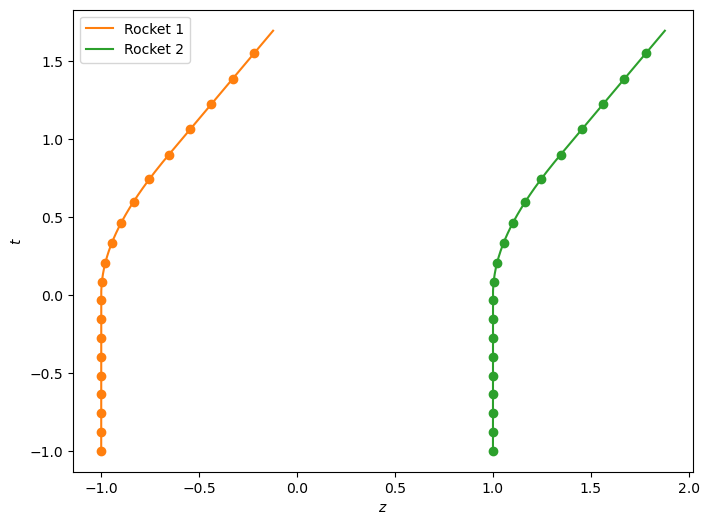

In [9]:
# Remake the space-time plot.
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(r1[1,:],r1[0,:],'-',color='C1',label='Rocket 1')
ax.plot(r2[1,:],r2[0,:],'-',color='C2',label='Rocket 2')
# We can put some markers on the world line just to help orientation later.
ax.plot(r1[1,::10],r1[0,::10],'o',color='C1')
ax.plot(r2[1,::10],r2[0,::10],'o',color='C2')
#
ax.legend()
ax.set_xlabel('$z$')
ax.set_ylabel('$t$')

Calling the (final) moving frame $S^\prime$, in this frame rocket 2 starts accelerating before rocket 1 and also stops accelerating before rocket 1. Due to this 2 will always have higher velocity than 1 up until the moment 1 is finished accelerating too, and both of them are at rest with respect to $S^\prime$. The distance between 1 and 2 keeps on increasing till 1 stops accelerating.

Taking the limit that the acceleration duration is very small (and the acceleration can be artibrarily large to get whatever desired final velocity we want) our world lines (in the original frame or frame of rocket 0) go from vertical to having slope $dx/dt=v$ at $\tau=0$.  Now when we Lorentz transform into $S^\prime$ we see that the length is increasing prior to the point when both rocket ships come to rest (in $S^\prime$).

In [10]:
# Make the Lorentz transformation matrix, Lambda:
lamb = np.array( [ [gam0,-gam0*vel0], [-gam0*vel0,gam0] ])
print(lamb)
# and generate world-line coordinates in the new frame.
r1p = np.dot(lamb,r1)
r2p = np.dot(lamb,r2)

[[ 1.34552289 -0.90023988]
 [-0.90023988  1.34552289]]


Text(0, 0.5, '$t^\\prime$')

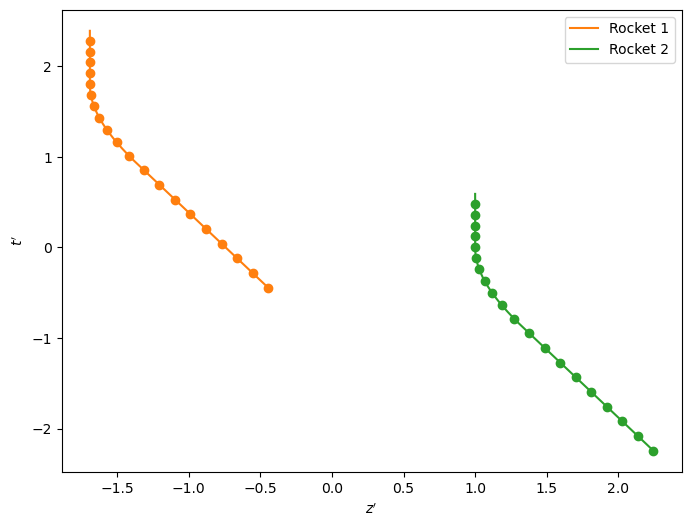

In [11]:
# Remake the space-time plot in the primed coordinates
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(r1p[1,:],r1p[0,:],'-',color='C1',label='Rocket 1')
ax.plot(r2p[1,:],r2p[0,:],'-',color='C2',label='Rocket 2')
# We can put some markers on the world line just to help orientation later.
ax.plot(r1p[1,::10],r1p[0,::10],'o',color='C1')
ax.plot(r2p[1,::10],r2p[0,::10],'o',color='C2')
#
ax.legend()
ax.set_xlabel(r'$z^\prime$')
ax.set_ylabel(r'$t^\prime$')

### Born rigid motion

A slightly different problem, that you are now also in a position to solve is:  "What acceleration profile is required by the second spaceship so that the distance between the spaceships remains constant in their proper frame?"

### Take away

What is quite interesting is the important role played by electromagnetic forces in generating the length contraction of the string.  What matters for us in this problem is that a string behaves differently than two space-time points (in our case the positions of the two rockets).  The former contracts, while the latter can maintain a fixed separation at arbitrarily high velocity.

## The End